# 선형 회귀(Linear Regression)  
  
1. 데이터에 대한 이해(Data Definition)  
1) 훈련 데이터셋과 테스트 데이터셋  
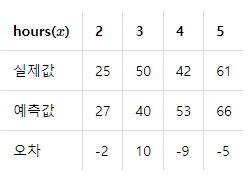  
  
2) 훈련 데이터셋의 구성  
x_train = torch.FloatTensor([[1], [2], [3]])  #훈련 데이터  
y_train = torch.FloatTensor([[2], [4], [6]])  #정답  
  
2. 가설(Hypothesis) 수립  
선형 회귀의 가설(직선의 방정식) 
  
y=Wx+b  
  
가설의 H를 따서 y 대신 다음과 같이  표현하기도  함.  
  
H(x)=Wx+b  
  
이때 x와 곱해지는 w를 가중치(Weight), b를 편향(bias)이라고 함.  
  
3. 비용함수(cost function)  
가설함수의 결과 값들과 예측값들의 차의 총 합. 즉 예측한 값과 실제값의 거리 계산  
  
비용 함수(cost function) = 손실 함수(loss function) = 오차 함수(error function) = 목적 함수(objective function)  
  
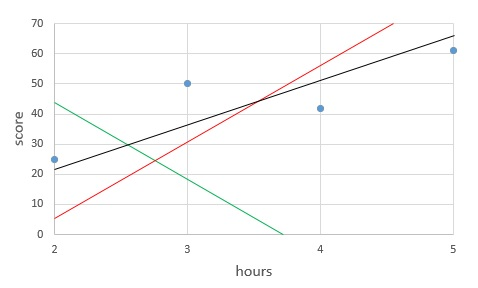  
  
다음은 가설이 y=13x+1일때의 그래프와 실제값을 보여준다.  
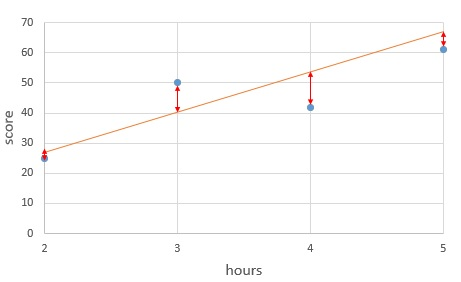  
  
실제값, 위 가설의 예측값, 오차를 보여준다.  
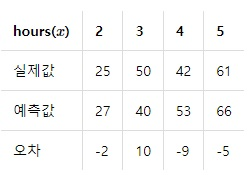  
  
이렇게 오차는 실제값과 예측값의 거리를 나타내므로 거리가 짧을 수록 가설 수식이 올바르다고 할 수 있으며 이러한 가설을 찾기 위해 적합한 w(가중치)와 b(편향)을 찾아 나가는 것이 바로 학습이다.  
  
오차는 양수일 수도 있고 음수일 수도 있으므로 거리를 계산하려면 절대값 또는 제곱값을 사용해야 한다.  
  
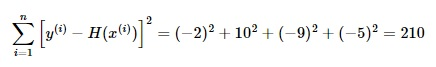  
  
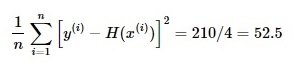  
  
위 유도에 의해서 이렇게 비용 함수를 정의할 수 있다.  
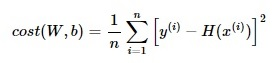  
  
4. 경사 하강법(옵티마이저)  
임의의 w(가중치)와 b(편향)에 대해서 비용함수를 계산하여 가장 최소가 되는 값을 찾는 것을 옵티마이저(Optimizer) 알고리즘 또는 최적화 알고리즘이라 한다.   
  
w와 cost의 관계를 그린 그래프  
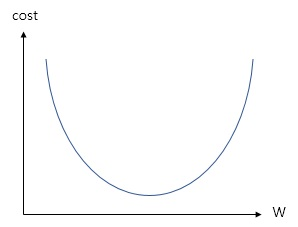  
기울기 w가 무한대로 커지면 커질 수록 cost의 값 또한 무한대로 커지고, 반대로 기울기 w가 무한대로 작아져도 cost의 값은 무한대로 커진다. 위의 그래프에서 cost가 가장 작을 때는 맨 아래의 볼록한 부분이다. 학습은 cost가 가장 최소값을 가지게 하는 w를 찾는 일이다.    
  
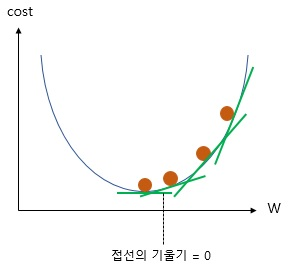  
그래프에서 cost가 가장 작은 w를 찾는 방법은 각 점에서의 기울기를 계산하여 기울기가 가장 작은 점(0이 되는 점)을 찾는다.  
  
즉 미분값이 0이 되는 지점이다. 경사 하강법의 아이디어는 비용 함수(Cost function)를 미분하여 현재 w에서의 접선의 기울기를 구하고, 접선의 기울기가 낮은 방향으로 w의 값을 변경하는 작업을 반복하는 것.       
새 w는 현재 w의 접선의 기울기를 구해 학습률(알파)을 곱한 값을 빼서 계산한다.  
  
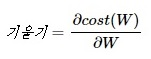  

기울기가 음수일 때 : w의 값이 증가  
  
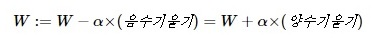  
기울기가 음수면 w의 값이 증가하는데 이는 결과적으로 접선의 기울기가 0인 방향으로 w의 값이 조정됨  
  
기울기가 양수일 때 : w의 값이 감소  
  
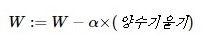  
기울기가 양수면 w의 값이 감소하게 되는데 이는 결과적으로 기울기가 0인 방향으로 w의 값이 조정됨  
  
결국 아래와 같이 w조정 수식을 만들 수 있음  
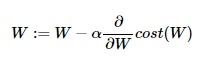  
  
학습률 알파  
학습률 알파는 w의 값을 변경할 때, 얼마나 크게 변경할지를 결정  
학습률 알파가 지나치게 높은 값을 가질 때, 접선의 기울기가 0이 되는 w를 찾아가는 것이 아니라 w의 값이 발산하는 상황을 보여주고 반대로 학습률 알파가 지나치게 낮은 값을 가지면 학습 속도가 느려지므로 적절한 알파를 찾는 것도 중요함  

# 파이토치로 선형회귀 구현

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
#랜덤 시드(random seed)
torch.manual_seed(1)

In [4]:
#학습 데이터와 레이블 변수에 저장
x_train = torch.FloatTensor([[1], [2], [3]]) #학습 데이터
y_train = torch.FloatTensor([[2], [4], [6]]) #학습 레이블(정답)

In [5]:
x_train

tensor([[1.],
        [2.],
        [3.]])

In [6]:
y_train

tensor([[2.],
        [4.],
        [6.]])

In [7]:
#가중치w와 편향 b 0으로 초기화하여 정의

#requires_grad=True:  이 변수는 학습을 통해 계속 값이 변경되는 변수임을 의미
W = torch.zeros(1, requires_grad=True) 
b = torch.zeros(1, requires_grad=True)

In [8]:
W

tensor([0.], requires_grad=True)

In [9]:
b

tensor([0.], requires_grad=True)

In [10]:
#가설 수식 만들기
hypothesis = x_train * W + b

In [11]:
#비용함수 정의
#cost = 1/n((예측값1-실제값1)제곱 + (예측값2-실제값2)제곱 ...)
cost = torch.mean((hypothesis - y_train) ** 2)

In [12]:
#경사 하강 알고리즘 정의. lr은 학습률
optimizer = optim.SGD([W, b], lr=0.01)

In [13]:
# gradient를 0으로 초기화
optimizer.zero_grad() 
# 비용 함수를 미분하여 gradient 계산
cost.backward() 
# W와 b를 업데이트
optimizer.step() 

In [15]:
print(cost)
print(W)
print(b)

tensor(18.6667, grad_fn=<MeanBackward0>)
tensor([0.1867], requires_grad=True)
tensor([0.0800], requires_grad=True)


<전체 코드>  
에포크(Epoch)는 전체 훈련 데이터가 학습에 한 번 사용된 주기  

In [3]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시킴. 그래서 미분을 초기화해주는 optimizer.zero_grad() 함수를 사용해야함  

In [17]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


# 다중 선형 회귀

훈련 데이터 x의 값이 다수인 선형회귀  
  
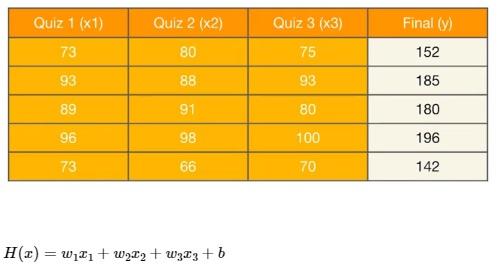  

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [19]:
torch.manual_seed(1)

In [20]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [21]:
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [22]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563634
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497607
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435026
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375730
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319511
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215696
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167818
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079378


벡터와 행렬 연산으로 바꾸기  
x의 개수가 3개였으니까 x1_train, x2_train, x3_train와 w1, w2, w3를 일일히 선언했지만 x의 개수가 1,000개라고 하면 일일이 선언하기는 힘들다. 이를 행렬로 변환하여 처리하면 훨씬 간단해 진다.  

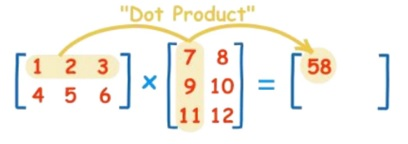  
  
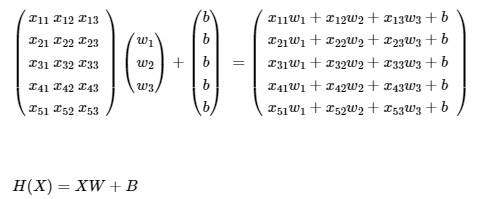  
  
이를 코드로 작성하면 다음가 같다.  

In [23]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [24]:
x_train

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  80.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.]])

In [25]:
y_train

tensor([[152.],
        [185.],
        [180.],
        [196.],
        [142.]])

In [26]:
# 가중치와 편향 선언
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [27]:
#가설
hypothesis = x_train.matmul(W) + b

In [28]:
#전체 코드
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7861,  95.8280]) Cost: 3069.590820
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp

# nn.Module로 구현하기

파이토치에는 선형 회귀 모델이 구현되어 함수로 제공되고 있다.  
  
선형 회귀 모델: nn.Linear(input_dim, output_dim)  
평균 제곱오차: nn.functional.mse_loss(prediction, y_train)  

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [32]:
torch.manual_seed(1)

In [33]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [34]:
# 모델을 선언 및 초기화. 
model = nn.Linear(1,1)

In [37]:
#2개의 값이 출력되는데 첫번째 값이 W고, 두번째 값이 b
#두 값 모두 현재는 랜덤 초기화가 되어져 있다
list(model.parameters())

[Parameter containing:
 tensor([[0.5153]], requires_grad=True),
 Parameter containing:
 tensor([-0.4414], requires_grad=True)]

In [38]:
# optimizer 정의. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [39]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [40]:
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]]) 
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward>)


In [41]:
list(model.parameters())

[Parameter containing:
 tensor([[1.9994]], requires_grad=True),
 Parameter containing:
 tensor([0.0014], requires_grad=True)]

 H(x)식에 x입력 로부터 예측된 y를 얻는 것을 forward 연산한다.  
   
학습 전, prediction = model(x_train)은 x_train으로부터 예측값을 리턴하므로 forward 연산이다.  
  
학습 후, pred_y = model(new_var)는 임의의 값 new_var로부터 예측값을 리턴하므로 forward 연산이다.  
  
학습 과정에서 비용 함수를 미분하여 기울기를 구하는 것을 backward 연산이라고 한다.  
  
cost.backward()는 비용 함수로부터 기울기를 구하라는 의미이며 backward 연산이다.  
  
<다중 선형 회귀 라이브러리 함수로 구현>  
가설: H(x) = w1x1 + w2x2 + w3x3 + b

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [43]:
torch.manual_seed(1)

In [44]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [45]:
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)

In [46]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True),
 Parameter containing:
 tensor([0.2710], requires_grad=True)]

In [47]:
#optimizer 정의 . 학습률 lr=0.00001
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [48]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.599609
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210559
Epoch 1100/2000 Cost: 0.209230
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206762
Epoch 1400/2000 Cost: 0.205618
Epoch 1500/2000 Cost: 0.204529
Epoch 1600/2000 Cost: 0.203481
Epoch 1700/2000 Cost: 0.202486
Epoch 1800/2000 Cost: 0.201539
Epoch 1900/2000 Cost: 0.200634
Epoch 2000/2000 Cost: 0.199770


In [49]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.2306]], grad_fn=<AddmmBackward>)


In [50]:
list(model.parameters())

[Parameter containing:
 tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True),
 Parameter containing:
 tensor([0.2802], requires_grad=True)]

# 미니배치와 데이터 로드

학습 데이터 수가 많은 상황에서 한번에 경사 하강법을 수행하면 속도가 매우 느려지고 메모리가 부족한 상황이 될 수도 있다. 이를 개선하기 위해 샘플을 작은 단위로 나누어 학습하는 방법이 미니 배치 방법이다.  
  
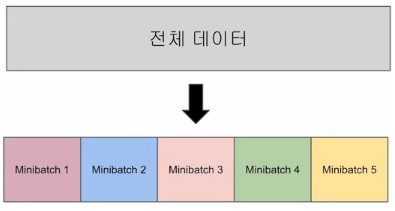  
  
처음 미니 배치부터 마지막 미니 배치까지, 미니 배치별 비용(cost)를 계산하고, 경사 하강법을 수행한다. 이렇게 전체 데이터에 대한 처리를 한번 수행하는 것을 1 에포크라고 한다.  
  
전체 데이터에 대해서 한 번에 경사 하강법을 수행하는 방법인 배치 경사 하강법은 경사 하강법을 할 때, 전체 데이터를 사용하므로 가중치 값이 최적값에 수렴하는 과정이 매우 안정적이지만, 계산량이 너무 많다. 미니 배치 경사 하강법은 경사 하강법을 할 때, 전체 데이터의 일부만을 보고 수행하므로 최적값으로 수렴하는 과정에서 값이 조금 헤매기도 하지만 훈련 속도가 빠르다.  
  
미니 배치의 크기는 2의 배수로 지정  
  
이터레이션  
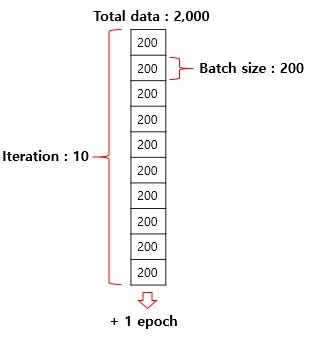  
  
이터레이션은 한 번의 에포크 내에서 이루어지는 매개변수인 가중치 w와 b의 업데이트 횟수다. 전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10개다. 이는 한 번의 에포크 당 매개변수 업데이트가 10번 이루어짐을 의미한다.  
  
<데이터 로드>  
파이토치에서는 데이터를 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 데이터셋(Dataset)과 데이터로더(DataLoader)를 제공한다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있다.  

In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [53]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [54]:
dataset = TensorDataset(x_train, y_train)

In [55]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [56]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [57]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 40394.078125
Epoch    0/20 Batch 2/3 Cost: 10625.849609
Epoch    0/20 Batch 3/3 Cost: 5451.569824
Epoch    1/20 Batch 1/3 Cost: 937.502686
Epoch    1/20 Batch 2/3 Cost: 265.944763
Epoch    1/20 Batch 3/3 Cost: 244.422516
Epoch    2/20 Batch 1/3 Cost: 3.523164
Epoch    2/20 Batch 2/3 Cost: 55.838959
Epoch    2/20 Batch 3/3 Cost: 2.371156
Epoch    3/20 Batch 1/3 Cost: 21.615038
Epoch    3/20 Batch 2/3 Cost: 1.536141
Epoch    3/20 Batch 3/3 Cost: 23.620941
Epoch    4/20 Batch 1/3 Cost: 12.848389
Epoch    4/20 Batch 2/3 Cost: 17.578531
Epoch    4/20 Batch 3/3 Cost: 18.382185
Epoch    5/20 Batch 1/3 Cost: 11.401794
Epoch    5/20 Batch 2/3 Cost: 20.960949
Epoch    5/20 Batch 3/3 Cost: 28.939528
Epoch    6/20 Batch 1/3 Cost: 14.807865
Epoch    6/20 Batch 2/3 Cost: 2.599264
Epoch    6/20 Batch 3/3 Cost: 33.501408
Epoch    7/20 Batch 1/3 Cost: 16.869854
Epoch    7/20 Batch 2/3 Cost: 24.528923
Epoch    7/20 Batch 3/3 Cost: 10.461182
Epoch    8/20 Batch 1/3 Cost: 8.6

In [58]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[157.2804]], grad_fn=<AddmmBackward>)
